In [128]:
import os 
import json
import numpy as np
import matplotlib.pyplot as plt
from segmentation_mask_overlay import overlay_masks
import matplotlib.image as mpimg

In [39]:
path = "Mini_BAGLS_dataset"

In [40]:
#get all filenames
files = os.listdir(path)

print(type(files))

#print(files)

<class 'list'>


In [7]:
from pathlib import Path
path_pathlib = Path(path)
path_pathlib / "test.png"

WindowsPath('Mini_BAGLS_dataset/test.png')

In [8]:
#iterate over the list 

#for f in files:
  #  print(f)

In [110]:
filenames = [x for x in files if ".meta"]
filenames

['9', '_', 's', 'e', 'g', '.', 'p', 'n', 'g']

In [10]:
import glob

In [106]:
glob_filenames = glob.glob(path + "/*.meta")
glob_filenames

['Mini_BAGLS_dataset\\0.meta',
 'Mini_BAGLS_dataset\\1.meta',
 'Mini_BAGLS_dataset\\10.meta',
 'Mini_BAGLS_dataset\\11.meta',
 'Mini_BAGLS_dataset\\12.meta',
 'Mini_BAGLS_dataset\\13.meta',
 'Mini_BAGLS_dataset\\14.meta',
 'Mini_BAGLS_dataset\\15.meta',
 'Mini_BAGLS_dataset\\16.meta',
 'Mini_BAGLS_dataset\\17.meta',
 'Mini_BAGLS_dataset\\18.meta',
 'Mini_BAGLS_dataset\\19.meta',
 'Mini_BAGLS_dataset\\2.meta',
 'Mini_BAGLS_dataset\\20.meta',
 'Mini_BAGLS_dataset\\21.meta',
 'Mini_BAGLS_dataset\\22.meta',
 'Mini_BAGLS_dataset\\23.meta',
 'Mini_BAGLS_dataset\\24.meta',
 'Mini_BAGLS_dataset\\25.meta',
 'Mini_BAGLS_dataset\\26.meta',
 'Mini_BAGLS_dataset\\27.meta',
 'Mini_BAGLS_dataset\\28.meta',
 'Mini_BAGLS_dataset\\29.meta',
 'Mini_BAGLS_dataset\\3.meta',
 'Mini_BAGLS_dataset\\30.meta',
 'Mini_BAGLS_dataset\\31.meta',
 'Mini_BAGLS_dataset\\32.meta',
 'Mini_BAGLS_dataset\\33.meta',
 'Mini_BAGLS_dataset\\34.meta',
 'Mini_BAGLS_dataset\\35.meta',
 'Mini_BAGLS_dataset\\36.meta',
 'Mini_BAGLS

In [13]:
print(filenames[4])
filenames[4].split(".")[0]

1.png


'1'

In [14]:
# iterate over the filenames(with index)

for idx, f in enumerate(filenames):
    if idx == 5:
        break
    print(idx)
    print(f)

0
0.meta
1
0.png
2
0_seg.png
3
1.meta
4
1.png


In [15]:
for f in filenames[:5]:
    print(idx)
    print(f)

5
0.meta
5
0.png
5
0_seg.png
5
1.meta
5
1.png


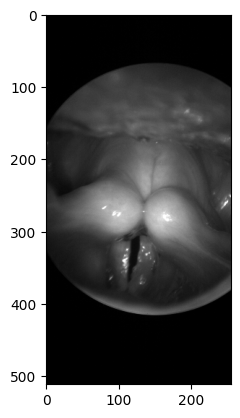

In [16]:
import imageio.v3 as io
from PIL import Image
import skimage
import cv2

#load image with different libraries

img_path = "Mini_BAGLS_dataset/50.png"
img = io.imread(img_path)

plt.imshow(img)

In [17]:
#which image loading function to use?

import time 
def test_read_image(imgfile, func):
    t0= time.time()
    img = func(imgfile)
    t = time.time() - t0
    return t 

functions = [io.imread, Image.open, skimage.io.imread, cv2.imread]

times = []
for func in functions:
    t = test_read_image(img_path, func)
    times.append(t)
        

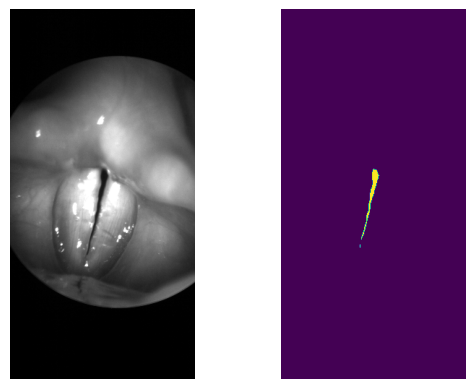

{
    "Video Id": 37,
    "Camera": "KayPentax HSV 9710 (Photron)",
    "Sampling rate (Hz)": 4000,
    "Video resolution (px, HxW)": [
        512,
        256
    ],
    "Color": false,
    "Endoscope orientation": "70\u00b0",
    "Endoscope application": "oral",
    "Age range (yrs)": "20-30",
    "Subject sex": "w",
    "Subject disorder status": "healthy",
    "Segmenter": 0,
    "Post-processed": 1
}


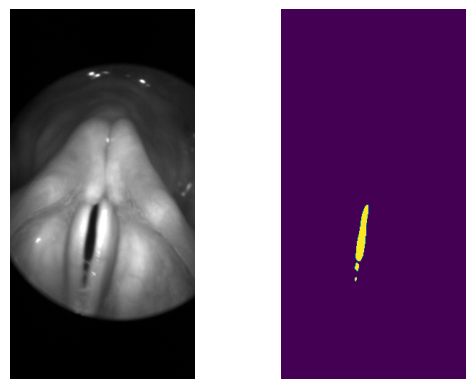

{
    "Video Id": 277,
    "Camera": "KayPentax HSV 9710 (Photron)",
    "Sampling rate (Hz)": 4000,
    "Video resolution (px, HxW)": [
        512,
        256
    ],
    "Color": false,
    "Endoscope orientation": "70\u00b0",
    "Endoscope application": "oral",
    "Age range (yrs)": "",
    "Subject sex": "w",
    "Subject disorder status": "healthy",
    "Segmenter": 0,
    "Post-processed": 1
}


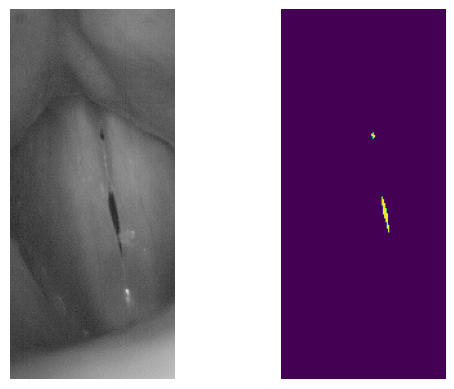

{
    "Video Id": 567,
    "Camera": "KayPentax HSV 9710 (Photron)",
    "Sampling rate (Hz)": 6000,
    "Video resolution (px, HxW)": [
        288,
        128
    ],
    "Color": false,
    "Endoscope orientation": "70\u00b0",
    "Endoscope application": "oral",
    "Age range (yrs)": "40-50",
    "Subject sex": "m",
    "Subject disorder status": "healthy",
    "Segmenter": 1,
    "Post-processed": 2
}


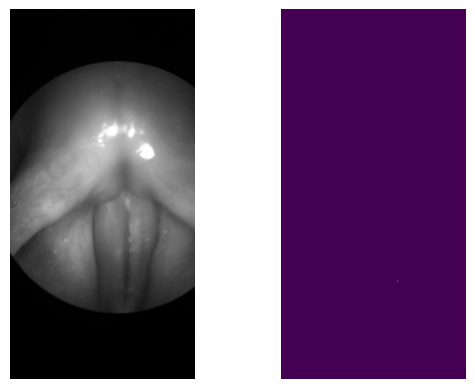

{
    "Video Id": 104,
    "Camera": "KayPentax HSV 9710 (Photron)",
    "Sampling rate (Hz)": 4000,
    "Video resolution (px, HxW)": [
        512,
        256
    ],
    "Color": false,
    "Endoscope orientation": "70\u00b0",
    "Endoscope application": "oral",
    "Age range (yrs)": "50-60",
    "Subject sex": "w",
    "Subject disorder status": "healthy",
    "Segmenter": 0,
    "Post-processed": 2
}


In [105]:

for idx, f in enumerate(glob_filenames):
    if idx == 4:
        break
        
    basename = os.path.basename(f)
    name = basename.split(".")[0]
    
    img_path = os.path.join(path, name + ".png")
    seg_path = os.path.join(path, name + "_seg.png")
    meta_path = os.path.join(path, name + ".meta")
  
    
    img = io.imread(img_path)
    seg = io.imread(seg_path)
    
    
    fig, (ax1,ax2) = plt.subplots(1,2)
    ax1.imshow(img); ax1.axis("off")
    ax2.imshow(seg); ax2.axis("off")
    plt.show()
    
    with open(meta_path,'r') as f:
        print(f.read())
   


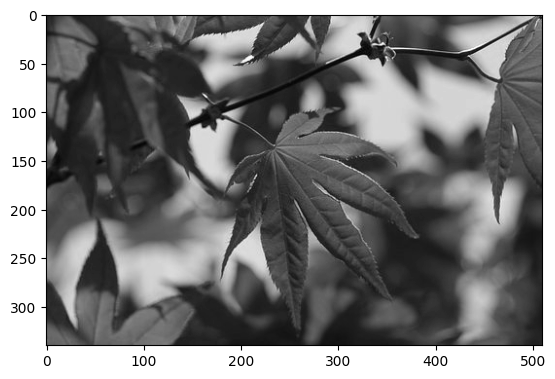

In [150]:
img_path = 'leaves.jpg'

img = cv2.imread(img_path)
#print(img.shape)
#(1300, 1950, 3)

#Matplotlib EXPECTS RGB (Red Greed Blue)
#but...
#OPENCV reads as Blue Green Red

#we need to transform this in order that Matplotlib reads it correctly
fix_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#plt.imshow(fix_img)

#Let's extract the three channels
R, G, B = fix_img[:,:,0], fix_img[:,:,1],fix_img[:,:,2]


grayscale_average_img = np.mean(fix_img, axis=2)
#print(grayscale_average_img)
fig.suptitle("healthy")
plt.imshow(grayscale_average_img, cmap='gray')


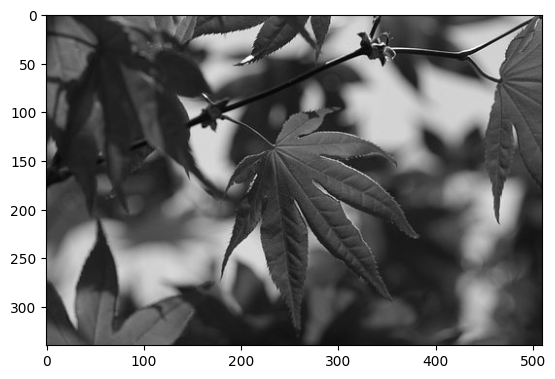

In [182]:
img_path = 'leaves.jpg'

img = cv2.imread(img_path)
#print(img.shape)
#(1300, 1950, 3)

#Matplotlib EXPECTS RGB (Red Greed Blue)
#but...
#OPENCV reads as Blue Green Red

#we need to transform this in order that Matplotlib reads it correctly
fix_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#plt.imshow(fix_img)

#Let's extract the three channels
R, G, B = fix_img[:,:,0], fix_img[:,:,1],fix_img[:,:,2]

Z = 0.2989 * R + 0.5870 * G + 0.1140 * B
#print(Z)

plt.imshow(Z, cmap='gray')
plt.savefig('image_luminosity_method.png')

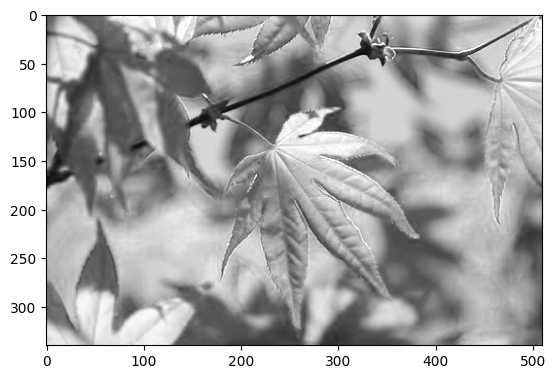

In [180]:
img_path = 'leaves.jpg'

img = cv2.imread(img_path)
#print(img.shape)
#(1300, 1950, 3)

#Matplotlib EXPECTS RGB (Red Greed Blue)
#but...
#OPENCV reads as Blue Green Red

#we need to transform this in order that Matplotlib reads it correctly
fix_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#plt.imshow(fix_img)

#Let's extract the three channels
R, G, B = fix_img[:,:,0], fix_img[:,:,1],fix_img[:,:,2]

X = np.minimum(R,G,B)+ np.maximum(R,G,B)/2
#print(grayscale_average_img)

plt.imshow(X, cmap='gray')
